<a href="https://colab.research.google.com/github/Franulo/DeepLearningJourney/blob/main/01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt # for Diagramms

In [ ]:
tensor = tf.constant([1, 2, 3])
print(tf.__version__)
tensor.shape

2.12.0


TensorShape([3])

# Neural Network Regression with TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it to be: predicting a number.

## Creating data to view and fit

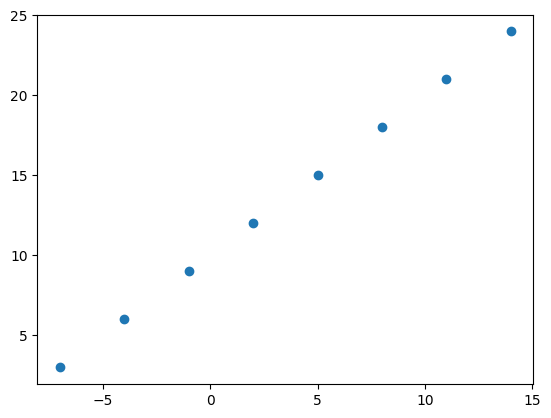

In [ ]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info.shape, house_price.shape

(TensorShape([3]), TensorShape([1]))

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
# Turn our NumPy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

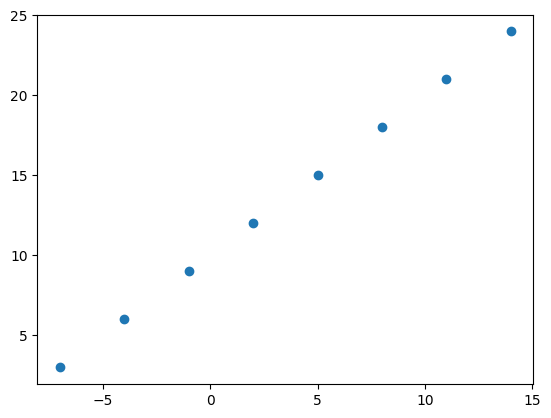

In [ ]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a  model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=200, verbose=0)


In [ ]:
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(1))

model1.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

model1.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose=0)

In [ ]:
model.predict([11.0]), model1.predict([11.0])

1/1 [==============================] - 0s 64ms/step


(array([[20.436697]], dtype=float32), array([[19.16383]], dtype=float32))

In [ ]:
X.numpy(), y.numpy()

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32))

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 39ms/step


array([[30.758984]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers,
increase the number of hidden units (all called neurons)
within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the learning rate of the optimization function.
3. **Fitting a model** - here we might fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn form).

In [ ]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose=0)

In [ ]:
model.predict([14])

1/1 [==============================] - 0s 70ms/step


array([[23.983963]], dtype=float32)

In [ ]:
X.numpy(), y.numpy()

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32))

## Evaluting a model

In practice, a typical workflow you'll go though when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak...
```

When it comes to evaluation... there are 3 words you should memorize:
> "Visualize, Visualize, Visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the orginal labels)?

In [ ]:
# Make a bigger dataset
x = tf.range(-100, 100, 4)
x.numpy()

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)

In [ ]:
# Make labels for the dataset
y = x + 10
y.numpy()

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)

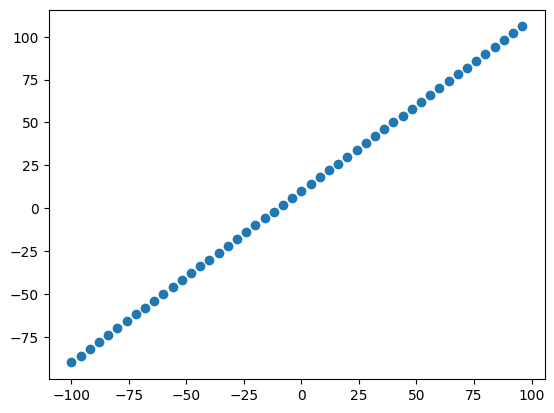

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(x, y)

### The 3 sets...

* Training set - the model learns from this data, which is typically 70-80% of the total data you have available.
* Validation set - model gets tuned on this data, which is typically 10-15% of the data available.
* Test set - the model gets evaluated on this data to test what it has learnend, this set is typically 10-15% of the total data available.

In [ ]:
# Check the length of how many samples we have
len(x), len(y)

(50, 50)

In [ ]:
# Split the data into train and test sets
x_train = x[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

x_test = x[40:]
y_test = y[40:]

len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

### Visualizing the data
Now we've got our data in training and test sets... let's visulizee it again!


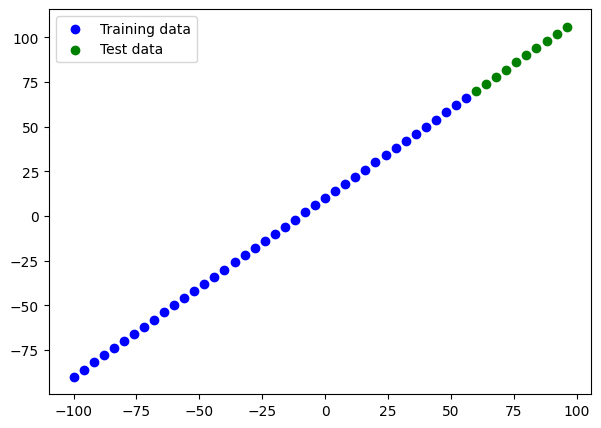

In [ ]:
plt.figure(figsize=(7, 5))
# Plot training data in blue
plt.scatter(x_train, y_train, c="b", label="Training data") # our model will learn on this
# Plot test data in green
plt.scatter(x_test, y_test, c="g", label="Test data") # want our model to be able to predict this (given x what's y?)
# Show a legend
plt.legend()

In [ ]:
# Let's have a look at how to build a neural network for our data
tf.random.set_seed(45)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1], name="layer1"),
], name="model")

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=["mae"])

### Visualizing the model

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learned patterns or parameters from other models during **transfer learning**).

In [ ]:
# Let's fit or model to the training data
model.fit(x_train, y_train, epochs=200, verbose=0)

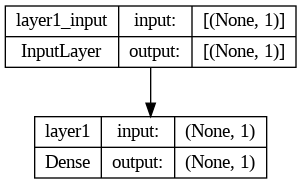

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.
Often you'll see this in the from of y_test or y_true versus y_pred (ground truth versus your model's predictions).

In [ ]:
# Make some predictions
y_pred = model.predict(x_test)
y_pred

1/1 [==============================] - 0s 52ms/step


array([[ 69.56474 ],
       [ 73.53384 ],
       [ 77.50294 ],
       [ 81.47203 ],
       [ 85.44113 ],
       [ 89.410225],
       [ 93.379326],
       [ 97.34842 ],
       [101.31752 ],
       [105.28662 ]], dtype=float32)

If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function.

In [ ]:
# Let's create a plotting function
def plot_predictions(figsize=(8, 5),
                     train_data=x_train,
                     train_labels=y_train,
                     test_data = x_test,
                     test_labels = y_test,
                     predictions = y_pred):
  plt.figure(figsize=figsize)
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  plt.legend()

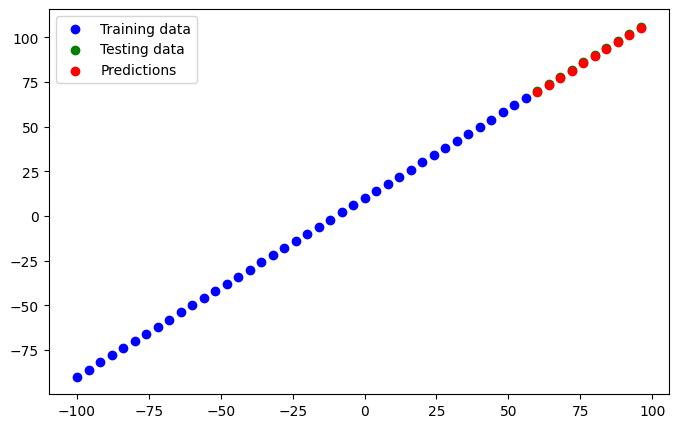

In [ ]:
plot_predictions(figsize=(8, 5))

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"

In [ ]:
# Evaluate the model on the test data
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 148ms/step - loss: 0.5743 - mae: 0.5743


[0.5743209719657898, 0.5743209719657898]

In [ ]:
tf.reduce_mean(tf.cast(y_test, dtype=tf.float32)-y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=0.574321>

In [ ]:
# Make some functions to reuse MAE and MSE

def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=y_pred)

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=y_pred)


### Runnig experiments to improve our model

```
Build a model -> Fit it -> evaluate it -> tweak it -> fit it -> evaluate it
```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in form of more layers or more hidden units in each layer.
3. Train for longer - give your model more fo a chance to find patterns in the data.

Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

In [ ]:
x_test, y_test

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [ ]:
x_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [ ]:
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_1.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 15.7998 - mae: 15.7998
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 11.0126 - mae: 11.0126
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 11.7894 - mae: 11.7894
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 9.2777 - mae: 9.2777
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 10.1430 - mae: 10.1430
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 9.4086 - mae: 9.4086
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 8.5523 - mae: 8.5523
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0427 - mae: 9.0427
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 18.7063 - mae: 18.7063
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 10.0890 - mae: 10.0890
Epoch 11/100
2/2 [==============================] - 0s 8ms/step - 

1/1 [==============================] - 0s 78ms/step


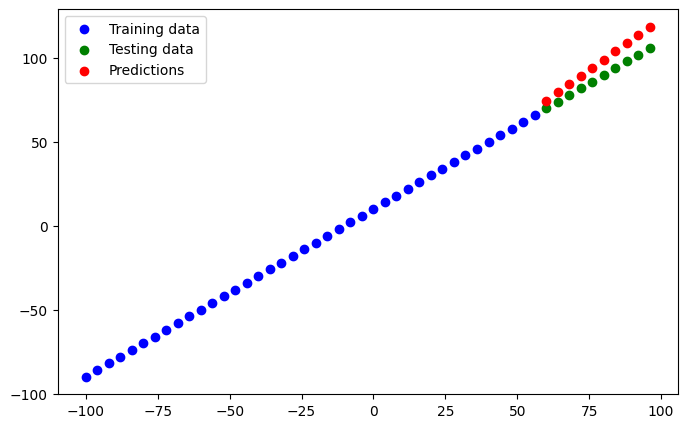

In [ ]:
y_pred_1 = model_1.predict(x_test)
plot_predictions(predictions=y_pred_1, figsize=(8, 5))
y_pred_1 = tf.constant(y_pred_1, shape=(10, ))

In [ ]:
tf.metrics.mean_absolute_error(y_test, y_pred_1)

<tf.Tensor: shape=(), dtype=float32, numpy=8.641304>

In [ ]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_2.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 18ms/step - loss: 47.2195 - mae: 47.2195
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 26.4992 - mae: 26.4992
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 30.8289 - mae: 30.8289
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 13.2031 - mae: 13.2031
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 17.3546 - mae: 17.3546
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 10.1588 - mae: 10.1588
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 11.1566 - mae: 11.1566
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 11.1130 - mae: 11.1130
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 40.7349 - mae: 40.7349
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 28.0995 - mae: 28.0995
Epoch 11/100
2/2 [==============================] - 0s 8

1/1 [==============================] - 0s 85ms/step


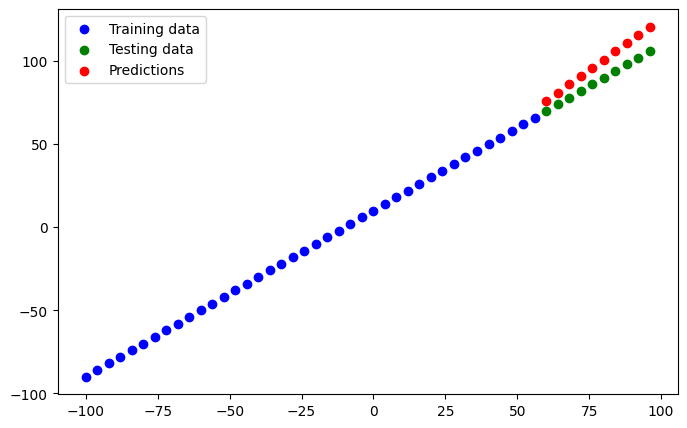

In [ ]:
y_pred_2 = model_2.predict(x_test)
plot_predictions(predictions=y_pred_2, figsize=(8, 5))
y_pred_2 = tf.constant(y_pred_2, shape=(10, ))

In [ ]:
tf.metrics.mean_absolute_error(y_test, y_pred_2)

<tf.Tensor: shape=(), dtype=float32, numpy=10.384701>

In [ ]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_3.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 13ms/step - loss: 16.6738 - mae: 16.6738
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 22.0696 - mae: 22.0696
Epoch 3/500
2/2 [==============================] - 0s 6ms/step - loss: 19.7224 - mae: 19.7224
Epoch 4/500
2/2 [==============================] - 0s 8ms/step - loss: 14.2432 - mae: 14.2432
Epoch 5/500
2/2 [==============================] - 0s 7ms/step - loss: 15.9179 - mae: 15.9179
Epoch 6/500
2/2 [==============================] - 0s 7ms/step - loss: 12.6146 - mae: 12.6146
Epoch 7/500
2/2 [==============================] - 0s 6ms/step - loss: 11.8824 - mae: 11.8824
Epoch 8/500
2/2 [==============================] - 0s 8ms/step - loss: 12.9583 - mae: 12.9583
Epoch 9/500
2/2 [==============================] - 0s 6ms/step - loss: 34.2093 - mae: 34.2093
Epoch 10/500
2/2 [==============================] - 0s 7ms/step - loss: 23.6448 - mae: 23.6448
Epoch 11/500
2/2 [==============================] - 0s 7ms

1/1 [==============================] - 0s 107ms/step


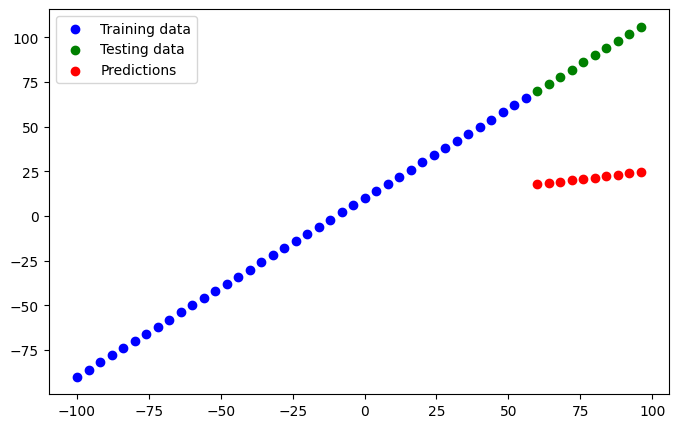

In [ ]:
y_pred_3 = model_3.predict(y_test)
plot_predictions(predictions=y_pred_3)
y_pred_3 = tf.constant(y_pred_3, shape=(10, ))

In [ ]:
tf.metrics.mean_absolute_error(y_test, y_pred_3)

<tf.Tensor: shape=(), dtype=float32, numpy=66.813095>

### Comparing the results of our experiments

We've run a few experiments, let's compare the results.


In [ ]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", tf.metrics.mean_absolute_error(y_test, y_pred_1).numpy()],
                 ["model_2", tf.metrics.mean_absolute_error(y_test, y_pred_2).numpy()],
                 ["model_3", tf.metrics.mean_absolute_error(y_test, y_pred_3).numpy()]]
all_results = pd.DataFrame(model_results, columns=["model", "mae"])
all_results

,model,mae
0,model_1,8.641304
1,model_2,10.384701
2,model_3,66.813095


## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

* TensorBoard - a component of the TensorFlow library to help track modelling experiments.
* Weights & Baises - a tool for tracking all of kinds of machine learning experiments (plugs straight into TensorBoard).

## Saving our models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in web apps or a mobile app.

There are two main formats we can save our model's too:

1. The SavedModel format
2. The HDF5 format

In [ ]:
# Save model
model_2.save("first_saved")

In [ ]:
# Save model using the HDF5 format
model_2.save("first_saved.h5")

## Loading in a saved model

In [ ]:
# Load in the SavedModel format model
loadedmodel_2 = tf.keras.models.load_model("/content/first_saved")
loadedmodel_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2_preds = model_2.predict(x_test)
loadedmodel_2_preds = loadedmodel_2.predict(x_test)
loadedmodel_2_preds == model_2_preds

1/1 [==============================] - 0s 134ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
loadedmodel_2H5 = tf.keras.models.load_model("/content/first_saved.h5")
loadedmodel_2_predsH5 = loadedmodel_2H5.predict(x_test)
loadedmodel_2_predsH5 == model_2_preds

1/1 [==============================] - 0s 94ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other file) from Google Colab

If you want to download your files from Google Colab:

1. You can go to the "files" tab and right click on the file you're after and click "download".
2. Use code (see the cell below).
3. Save it to Google Drive by connecting Google Drive and copying it there (see 2nd code cell below).

In [ ]:
# Download a file form Google Colab
from google.colab import files
files.download("/content/first_saved.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save a file from Google Colab to Google Drive (requires mounting Google Drive)
!cp /content/first_saved.h5 /content/drive/MyDrive/AI/Models

In [ ]:
!ls /content/first_saved.h5 /content/drive/MyDrive/AI/Models

/content/first_saved.h5

/content/drive/MyDrive/AI/Models:
first_saved.h5


## A larger example

In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
insurance["sex"]

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

In [5]:
# Let's try one-hot encode our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [6]:
# Create x & y values (features and labels)
x = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

x.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [7]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [8]:
# Create training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
len(x), len(x_train), len(x_test)

(1338, 1070, 268)

In [9]:
# Build a neural network
tf.random.set_seed(42)

model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model1.fit(tf.expand_dims(x_train, axis=-1), y_train, verbose=0, epochs=100)

In [10]:
model1.evaluate(x_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8916.8525 - mae: 8916.8525


[8916.8525390625, 8916.8525390625]

In [11]:
y_train.mean()

13346.089736364485

Right now it looks like our model isn't performing too well... let's try and improve it!

To (try) improve our model, we'll run 2 experiments:
1. Add an extra layer with more hidden units
2. Train for longer


In [12]:
tf.random.set_seed(42)

model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

model2.fit(tf.expand_dims(x_train, axis=-1), y_train, verbose=1, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13341.3506 - mae: 13341.3506
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13320.8555 - mae: 13320.8555
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13282.1240 - mae: 13282.1240
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 13209.8096 - mae: 13209.8096
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13087.7295 - mae: 13087.7295
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 12903.6611 - mae: 12903.6611
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 12665.0684 - mae: 12665.0684
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12406.2158 - mae: 12406.2158
Epoch 9/100
34/34 [==============================] - 0s 6ms/step - loss: 12198.8867 - mae: 12198.8867
Epoch 10/100
34/34 [==============================] - 0s 6ms/step - loss: 12114.87

In [13]:
model2.evaluate(x_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8627.9795 - mae: 8627.9795


[8627.9794921875, 8627.9794921875]

In [14]:
tf.random.set_seed(42)

model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

history = model3.fit(tf.expand_dims(x_train, axis=-1), y_train, verbose=0, epochs=200)

In [15]:
model3.evaluate(x_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8666.9277 - mae: 8666.9277


[8666.927734375, 8666.927734375]

Text(0.5, 0, 'epochs')

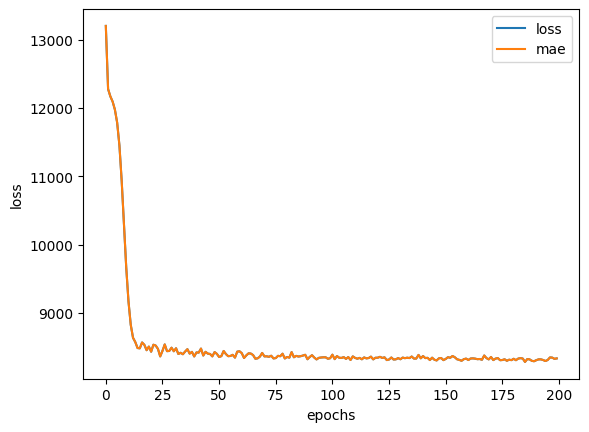

In [16]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

 **Question:** How long should you train for?

 It depends. Really... it depends on the problem you're working on. However, many people have asked this question before... so TensorFlow has a solution!
 It's called the EarlyStopping Callback (http://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a TensorFlow component you can add to your model to stop training once it stops improving a certrain metric.

## Preprogressing data (normalization and standardization)

In [17]:
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [18]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["mae"])

history = model.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=130, verbose=0)

Text(0.5, 0, 'epochs')

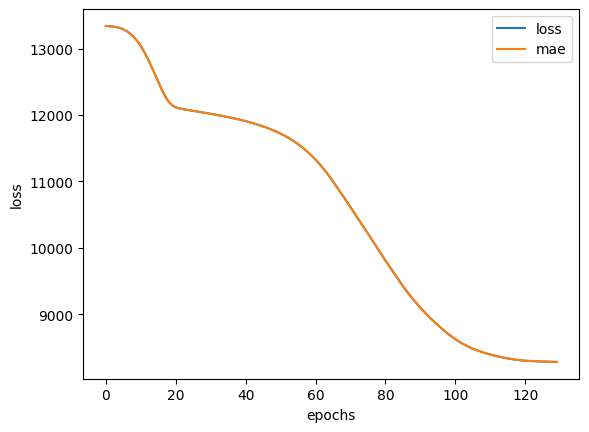

In [19]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [20]:
model.evaluate(x_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8600.6104 - mae: 8600.6104


[8600.6103515625, 8600.6103515625]